# 第九章　自然エネルギー利用設備 / Chapter 9 PV System

## 第一節　太陽光発電設備 / Section 1  Solar power plant

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from pyhees.section9_1 import calc_E_E_PV_d_t
from pyhees.section11_2 import load_solrad
from pyhees.section2_1_b import get_f_prim


# 試算例

In [23]:
def get_default_pv():

    base = {'region' : 5, 'sol_region' : 3} 

    panel_list = [{'etr_IN_r' : 0.96, 'P_p_i' : 4, 'pv_type' : '結晶シリコン系', 'pv_setup' : '架台設置型', 'P_alpha' : 0, 'P_beta' : 0}]


#    panel_list = [{'etr_IN_r' : 0.96, 'P_p_i' : 4, 'pv_type' : '結晶シリコン系', 'pv_setup' : '架台設置型', 'P_alpha' : 0, 'P_beta' : 0},
#                {'etr_IN_r' : 0.96, 'P_p_i' : 3, 'pv_type' : '結晶シリコン系', 'pv_setup' : '屋根置き型', 'P_alpha' : 90, 'P_beta' : 30},
#                {'etr_IN_r' : 0.96, 'P_p_i' : 2, 'pv_type' : '結晶シリコン系以外', 'pv_setup' : 'その他', 'P_alpha' : 180, 'P_beta' : 60},
#                {'etr_IN_r' : 0.96, 'P_p_i' : 1, 'pv_type' : '結晶シリコン系以外', 'pv_setup' : 'その他', 'P_alpha' : 270, 'P_beta' : 90}]

    return base, panel_list


In [24]:
def calc_results(spec, panel_list):
    
    # degreeをradianに変換
    panel_list_radians = []
    for panel_param in panel_list:

        panel_param['P_alpha'] = np.radians(panel_param['P_alpha'])
        panel_param['P_beta'] = np.radians(panel_param['P_beta'])
    
        panel_list_radians = panel_list_radians + [panel_param]


    solrad = load_solrad(**spec)
    
    res = calc_E_E_PV_d_t(panel_list_radians, solrad)

    f_prim = get_f_prim()

    EL_annual = np.sum(res)

    print("PV発電量:{}kWh/a(={}MJ/a)".format(int(EL_annual), int(EL_annual * f_prim / 1000)))
    
    return res

In [25]:
def get_each_graph(res):

    # 日別、時別値を作成
    res_day = np.mean(res.reshape(365,24), axis=1)
    res_hr = np.mean(res.reshape(365,24), axis=0)

    fig = plt.figure(figsize=(20,12))
    
    grh = fig.add_subplot(311)
    grh.plot(res)
    grh.set_ylabel("kWh/h")
    grh.set_xlabel("hour")
    
    grh_day = fig.add_subplot(312)
    grh_day.plot(res_day)
    grh_day.set_ylabel("kWh/h")
    grh_day.set_xlabel("day")
    
    grh_hr = fig.add_subplot(313)
    grh_hr.plot(res_hr)
    grh_hr.set_ylabel("kWh/h")
    grh_hr.set_xlabel("hour)")
    plt.show()


### 計算条件1

初期条件での計算

In [26]:
base, panel_list = get_default_pv()

testcase1 = calc_results(base, panel_list)


PV発電量:3920kWh/a(=38266MJ/a)


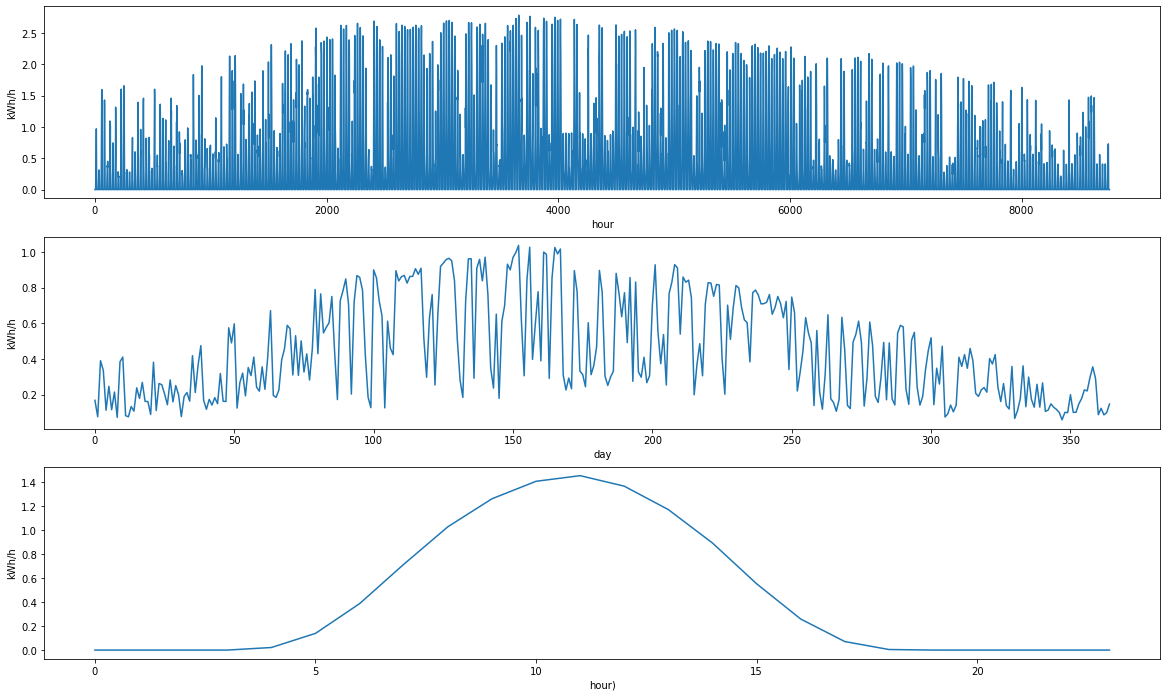

In [27]:
get_each_graph(testcase1)

### 計算条件2

- 地域区分を3に変更
- 日射地域区分を2に変更

In [28]:
base, panel_list = get_default_pv()

base['region'] = 3
base['sol_region'] = 2

testcase2 = calc_results(base, panel_list)

PV発電量:3596kWh/a(=35098MJ/a)


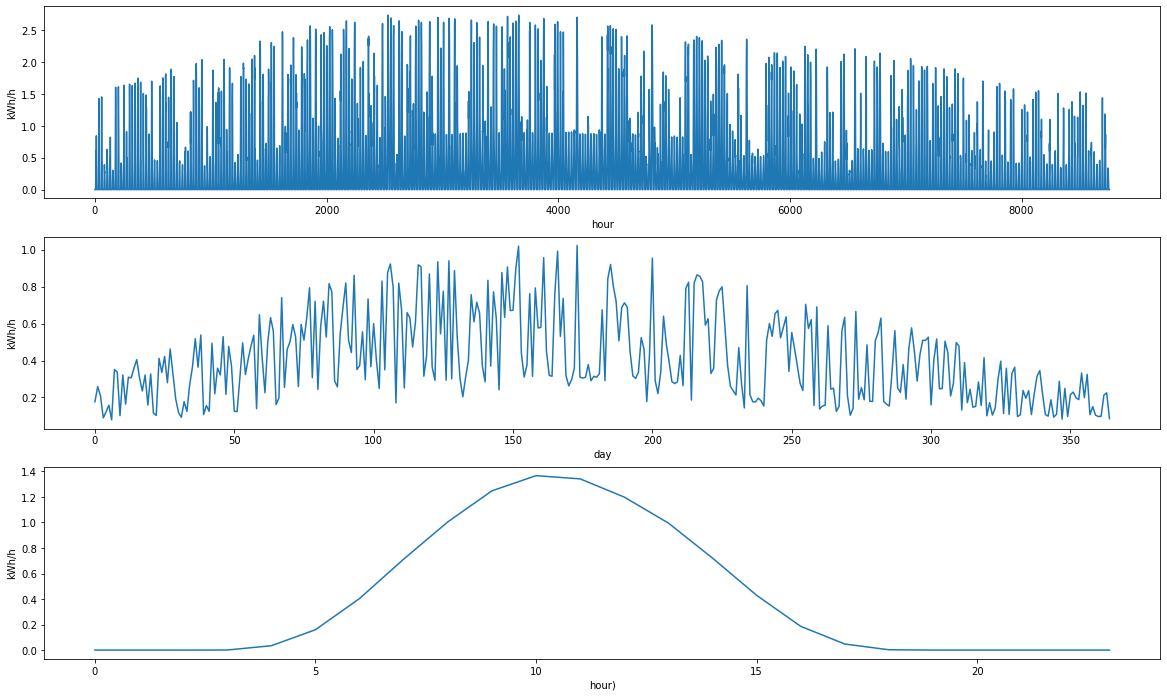

In [29]:
get_each_graph(testcase2)

### 計算条件3

- パワーコンディショナの定格負荷効率0.90に変更

In [30]:
base, panel_list = get_default_pv()

panel_list[0]['etr_IN_r'] = 0.90

testcase3 = calc_results(base, panel_list)

PV発電量:3675kWh/a(=35874MJ/a)


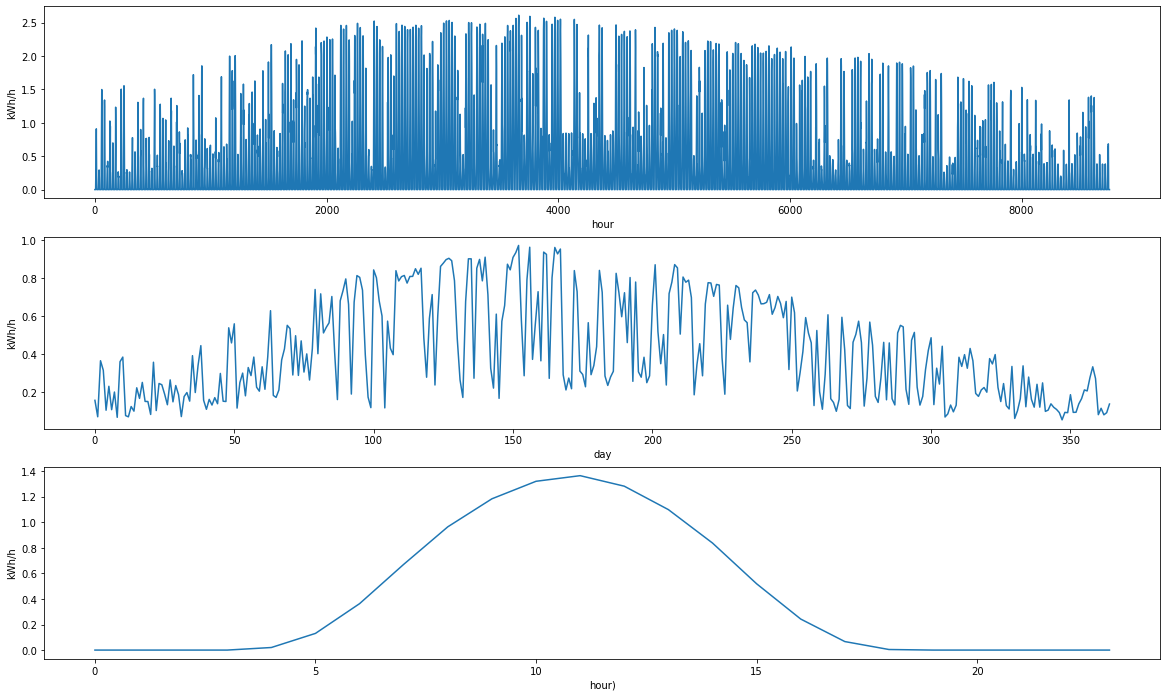

In [31]:
get_each_graph(testcase3)

### 計算条件4

- 太陽電池アレイの種類を「結晶シリコン系以外の太陽電池」に変更

In [32]:
base, panel_list = get_default_pv()

panel_list[0]['pv_type'] = '結晶シリコン系以外'

testcase4 = calc_results(base, panel_list)

PV発電量:4102kWh/a(=40044MJ/a)


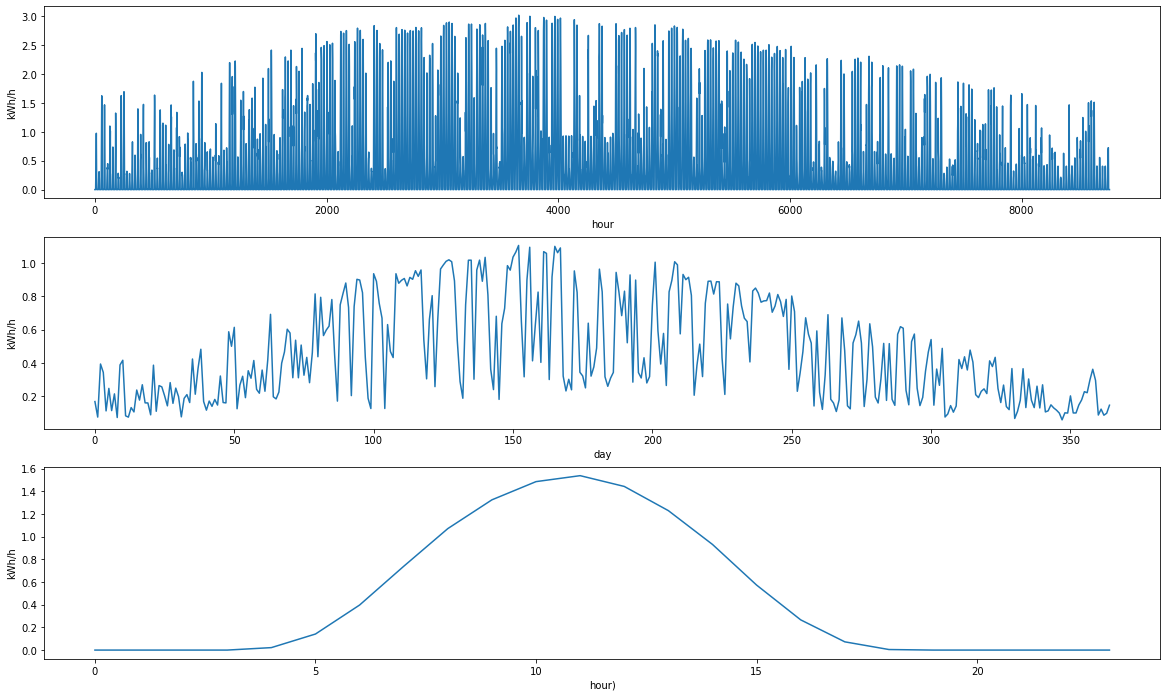

In [33]:
get_each_graph(testcase4)

### 計算条件5

- 太陽電池アレイ設置方式に「屋根置き形」に変更

In [34]:
base, panel_list = get_default_pv()

panel_list[0]['pv_setup'] = '屋根置き型'

testcase5 = calc_results(base, panel_list)

PV発電量:3892kWh/a(=37986MJ/a)


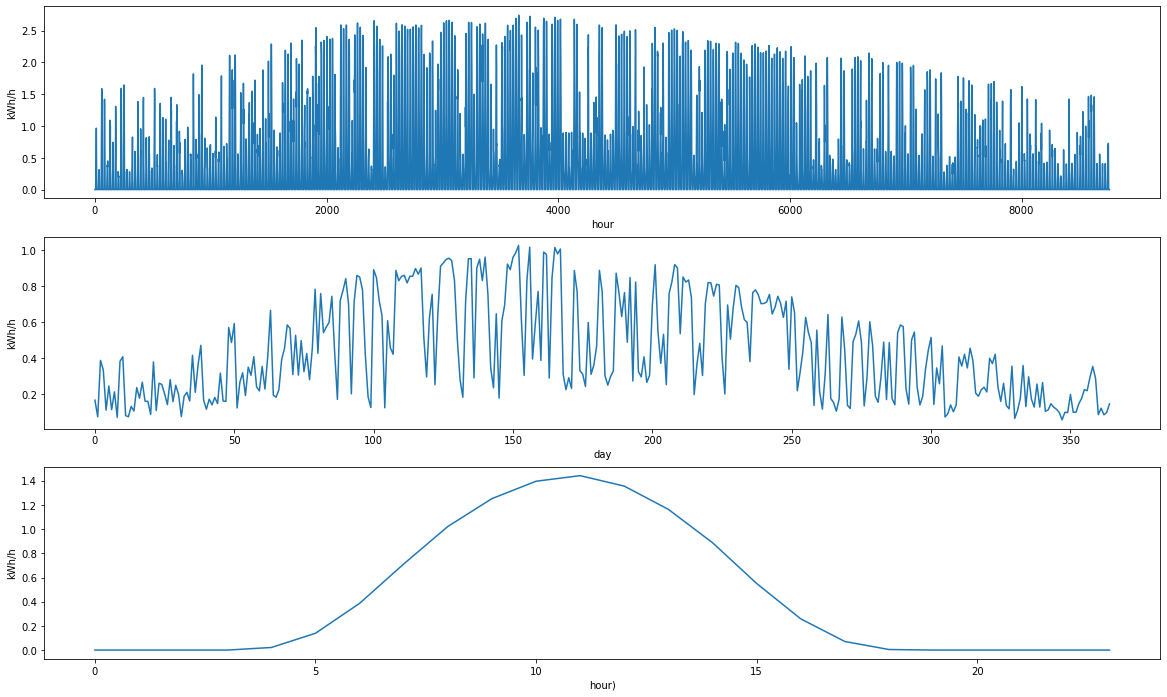

In [35]:
get_each_graph(testcase5)

### 計算条件6

- パネル設置傾斜角を30度に変更

In [36]:
base, panel_list = get_default_pv()

panel_list[0]['P_beta'] = 30

testcase6 = calc_results(base, panel_list)

PV発電量:4097kWh/a(=39991MJ/a)


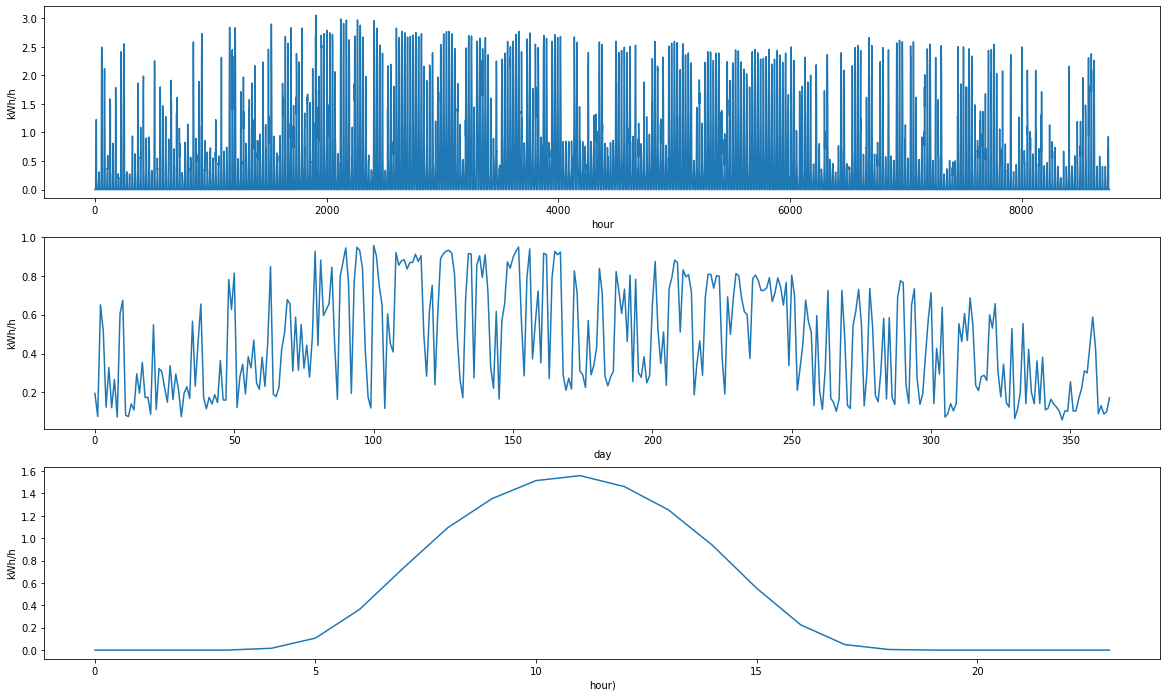

In [37]:
get_each_graph(testcase6)

### 計算条件7

- パネル設置傾斜角を30度に変更
- パネル設置方位角を真北に変更

In [38]:
base, panel_list = get_default_pv()

panel_list[0]['P_beta'] = 30
panel_list[0]['P_alpha'] = 180

testcase7 = calc_results(base, panel_list)

PV発電量:3005kWh/a(=29329MJ/a)


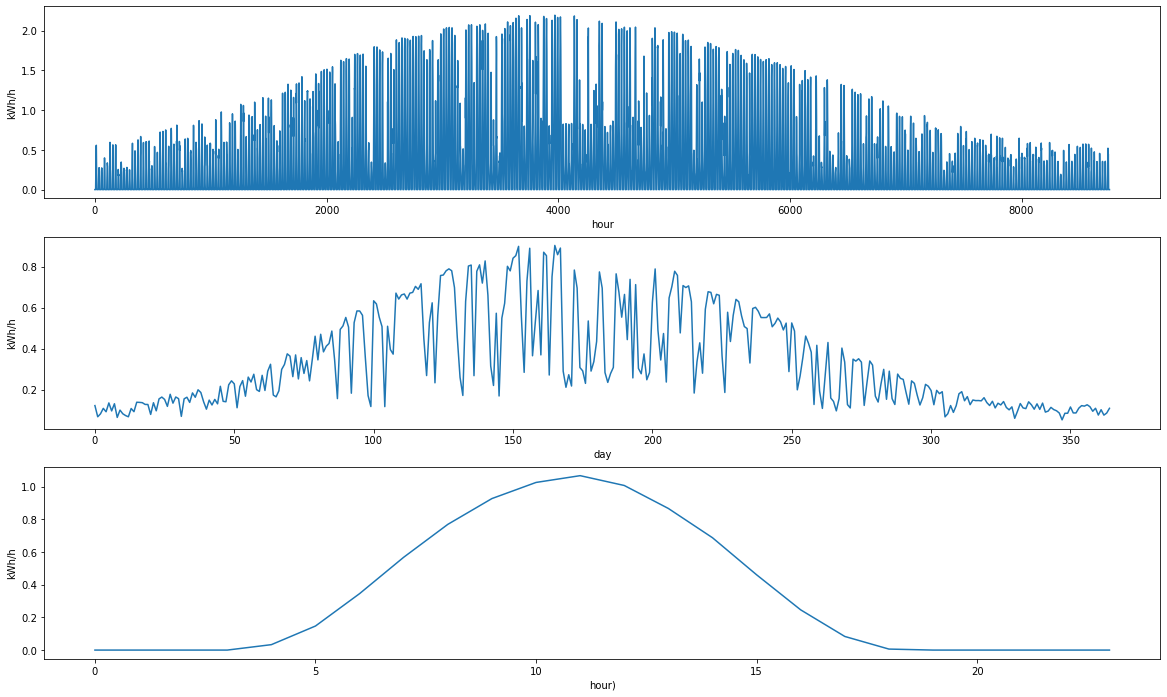

In [39]:
get_each_graph(testcase7)

### 計算条件8

- パネルを1面追加


In [40]:
base, panel_list = get_default_pv()

panel_list.append({'etr_IN_r' : 0.96, 'P_p_i' : 1.5, 'pv_type' : '結晶シリコン系', 'pv_setup' : '屋根置き型', 'P_alpha' : 90, 'P_beta' : 30})

testcase8 = calc_results(base, panel_list)

PV発電量:5262kWh/a(=51361MJ/a)


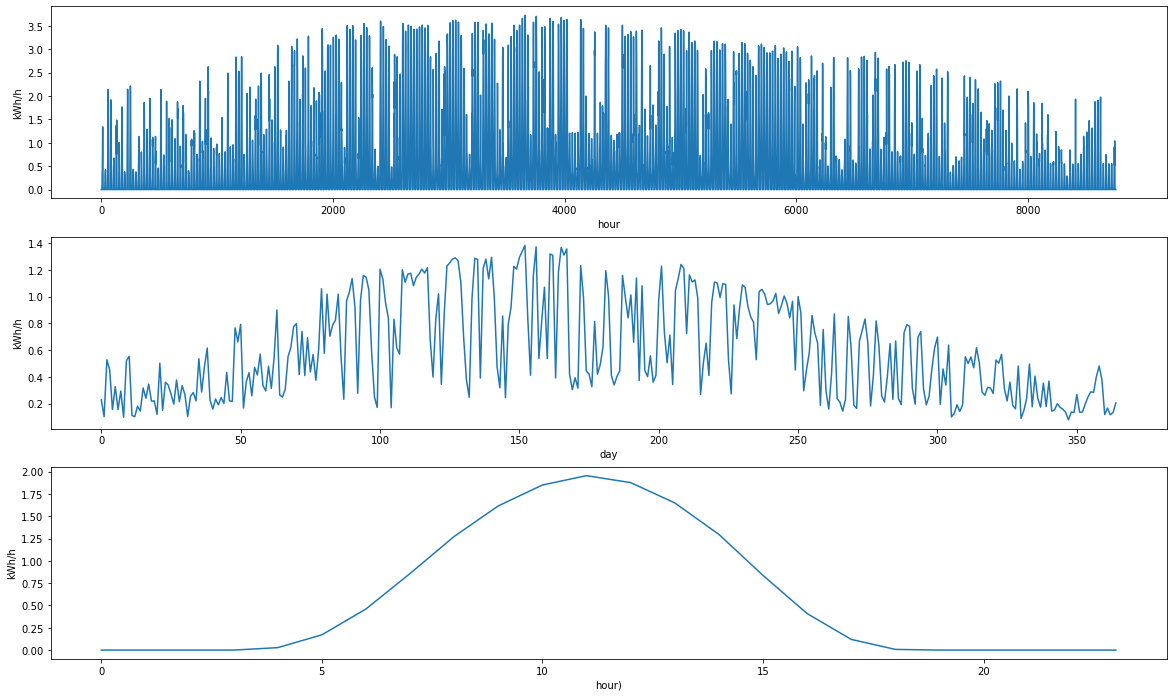

In [41]:
get_each_graph(testcase8)

## 比較

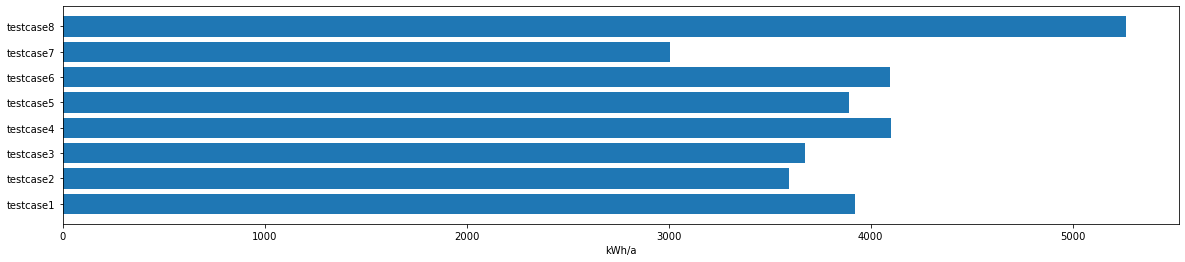

In [42]:
dat = {"testcase1":sum(testcase1),"testcase2" : sum(testcase2), "testcase3" : sum(testcase3), "testcase4" : sum(testcase4), 
       "testcase5" : sum(testcase5), "testcase6" : sum(testcase6), "testcase7" : sum(testcase7), "testcase8" : sum(testcase8)}
xx = list(dat.keys())
yy = list(dat.values())

fig = plt.figure(figsize=(20,4))
axt = fig.add_subplot(111)
axt.barh(xx,yy)
axt.set_xlabel("kWh/a")
plt.show()
